In [19]:
using PyPlot
using FFTW
using LinearAlgebra


include("rqrd.jl")


rqrd (generic function with 1 method)

In [8]:
function average_antidiagonals(matrix)
    n1, n2 = size(matrix)
    max_index = n1 + n2 - 1
    antidiagonal_sums = zeros(max_index)
    antidiagonal_counts = zeros(Int, max_index)

    for i = 1:n1
        for j = 1:n2
            index = i + j - 1
            antidiagonal_sums[index] += matrix[i, j]
            antidiagonal_counts[index] += 1
        end
    end

    antidiagonal_avgs = antidiagonal_sums ./ antidiagonal_counts
    return antidiagonal_avgs
end

function create_hankel_matrix(signal)
    # Length of the signal
    L = length(signal)

    # Determine the dimensions of the Hankel matrix
    n = floor(Int,L ÷ 2) 
    m = L - n + 1

    # Create the Hankel matrix
    hankel_matrix = zeros(m, n)

        for k in 1:n
            hankel_matrix[:,k] = signal[k:k + m - 1]
        end

        return hankel_matrix
    end
   

create_hankel_matrix (generic function with 1 method)

RMSE:0.005180109861490201


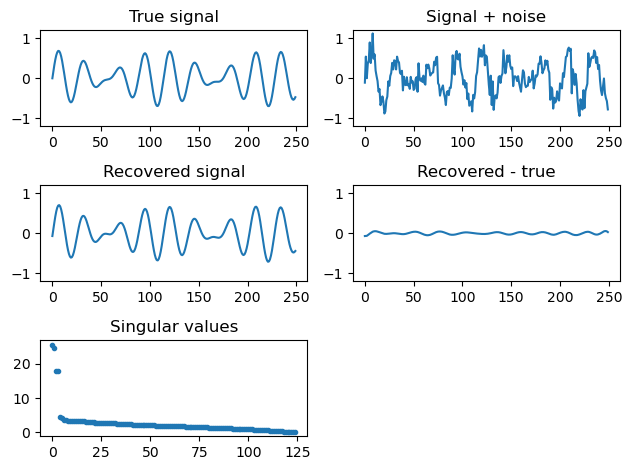

(126, 125)

In [60]:
L =250
x = collect(0:1:L-1)
signal = 0.3*sin.(2*pi*x*0.044).+0.4*sin.(2*pi*x*0.035)

sigma = 0.2
sn = signal .+ sigma*randn(L)

# SSA filter
   p = 4
   H = create_hankel_matrix(sn)
   F = svd(H)
   U = (F.U)[:,1:p]
   Hp = U*U'*H
   sp = average_antidiagonals(Hp)

   e = sum((signal-sp).^2)/sum(signal.^2)
  

   figure(1)
   subplot(321); plot(x,signal); ylim([-1.2,1.2]);title("True signal",)
   subplot(322); plot(x,sn); ylim([-1.2,1.2]);title("Signal + noise")
   subplot(323); plot(x,sp); ylim([-1.2,1.2]);title("Recovered signal")
   subplot(324); plot(x,sp-signal); ylim([-1.2,1.2]);title("Recovered - true")
   subplot(325); plot(F.S,".");title("Singular values")
   tight_layout()
 
   println("RMSE:", e)
   savefig("rank_1D_ssa_3.png")
   size(H)